In [1]:
#starting with their imports
%matplotlib inline
import pandas as pd
import numpy as np
import os, sys, subprocess
import matplotlib.pyplot as plt
#from tqdm import tqdm

#my imports
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Jay\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#then next few cells is how they bring in their data:

# ROOT_DIR - root directory
ROOT_DIR = os.getcwd()+'/'

# FEATURE_DIR - directory where feature dataframes are saved
DATA_DIR = ROOT_DIR + 'dataframes/'

In [3]:
#load their data
DF_prest = pd.concat([pd.read_csv(DATA_DIR+'DF_prest_features_1.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_2.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_3.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_4.csv',index_col=0)])
print ('Number of peptides:', len(DF_prest))

Number of peptides: 45206


In [4]:
DF_prest.head(1)

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,disembl_HOTLOOPS_frac,ronn_avg,ronn_results,ronn_frac,disopred_results,disopred_avg,disopred_pb_results,disopred_pb_avg,disopred_frac,disopred_pb_frac
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139,ATTATGACAGCTCCCTCCAGTTTTGAGCAGTTTAAAGTGGCAATGA...,0.057554,0.043165,0.021583,...,0.410072,0.495827,imtapssfeqfkvamnylqlynvpdclediqDADCSSSKCSSSASS...,0.482014,ImtapssfeqfkvamnylqlynvpdclediqdadcsSSKCSSSASS...,0.38705,-...................................^^^^^^^^^^...,0.31777,0.388489,0.359712


In [5]:
aa_features = ['list_comp_A','list_comp_R','list_comp_N',
               'list_comp_D','list_comp_C','list_comp_Q','list_comp_E','list_comp_G',
               'list_comp_H','list_comp_I','list_comp_L','list_comp_K','list_comp_M',
               'list_comp_F','list_comp_P','list_comp_S','list_comp_T','list_comp_W',
               'list_comp_Y','list_comp_V',
               # Amino acid types
               'frac_aliphatic', 'frac_uncharged_polar', 'frac_polar',
               'frac_hydrophobic', 'frac_positive', 'frac_sulfur', 'frac_negative', 'frac_amide',
               'frac_alcohol']

disorder_features = ['disembl_COILS_frac','disembl_REM465_frac','disembl_HOTLOOPS_frac','ronn_avg','ronn_frac',
                    'disopred_avg','disopred_pb_avg','disopred_frac','disopred_pb_frac']

                    
phys_features = ['aa_len',                                        
                # Physical properties
                 'bio_pI','bio_mW','bio_aromaticity','bio_instability','bio_gravy','abs_avg_charge','abs_charge',
                 'avg_charge']
                    
rna_features = ['AAA','AAC','AAT','AAG','ACA','ACC','ACT','ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT',
                'AGG','CAA','CAC','CAT','CAG','CCA','CCC','CCT','CCG','CTA','CTC','CTT','CTG','CGA','CGC',
                'CGT','CGG','TAA','TAC','TAT','TAG','TCA','TCC','TCT','TCG','TTA','TTC','TTT','TTG','TGA',
                'TGC','TGT','TGG','GAA','GAC','GAT','GAG','GCA','GCC','GCT','GCG','GTA','GTC','GTT','GTG',
                'GGA','GGC','GGT','GGG',
                'GC_content','list_nuc_A','list_nuc_C','list_nuc_G','list_nuc_T',
                'GC30',
                # SD sequences
                'sd_like_fwd','sd_like_fwd_frac','sd_like_rev','sd_like_rev_frac','sd_seq_fwd',
                'sd_seq_fwd_frac','sd_seq_rev','sd_seq_rev_frac',
                # RNA folding
                'RNA_folding_energy','RNA_40_energy','tAI']
                    
ss_features = ['acc20_mean','ss_helix', 'ss_ext', 'ss_c', 'ss8_helix', 'ss8_ext', 'ss8_turn', 'ss8_helix3',
               'ss8_pi_helix', 'ss8_bridge', 'ss8_bend', 'ss8_coil', 'acc_frac',
               'in_gravy','out_gravy', 'acc_hydrophilic_in','acc_hydrophilic_out',
               'acc_hydrophobic_in','acc_hydrophobic_out']

list_of_features = aa_features+disorder_features+phys_features+rna_features+ss_features

#changed this part of their code so I bring in all of the data instead of just the to and bottom 25%
DF_prest_features = DF_prest[list_of_features]

In [6]:
print(len(list_of_features))
DF_prest_features.head()

147


,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,list_comp_G,list_comp_H,list_comp_I,...,ss8_bridge,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out
0,0.057554,0.057554,0.064748,0.057554,0.050360,0.035971,0.071942,0.043165,0.007194,0.021583,...,0.000000,0.014388,0.546763,0.625899,0.599281,-1.199281,0.057554,0.438849,0.294964,0.115108
1,0.111111,0.069444,0.027778,0.000000,0.027778,0.020833,0.118056,0.076389,0.013889,0.020833,...,0.000000,0.013889,0.423611,0.638889,0.378472,-0.747917,0.069444,0.291667,0.263889,0.215278
2,0.066176,0.139706,0.110294,0.044118,0.058824,0.044118,0.000000,0.022059,0.044118,0.051471,...,0.022059,0.117647,0.235294,0.588235,0.360294,-0.994853,0.066176,0.323529,0.323529,0.176471
3,0.089431,0.056911,0.097561,0.073171,0.024390,0.056911,0.065041,0.048780,0.008130,0.008130,...,0.000000,0.008130,0.430894,0.674797,0.312195,-1.328455,0.073171,0.439024,0.235772,0.162602
4,0.072581,0.072581,0.016129,0.000000,0.072581,0.080645,0.080645,0.064516,0.056452,0.024194,...,0.000000,0.008065,0.395161,0.685484,0.572581,-1.391129,0.048387,0.379032,0.258065,0.193548


In [7]:
#select the top predictors from the paper
top_ten = ['bio_pI', #Grand avg hydropathy
          'list_comp_L', 'avg_charge', 'frac_polar', 'ss8_ext', 'acc_hydrophobic_in', #extended secondary structure (3-letter)
          'list_comp_Y'] #Average GRAVY]

In [14]:
#combine the predictors and the concentrations so I can down sample the data
df = pd.concat([DF_prest['conc_cf'], DF_prest_features[top_ten]], axis=1 )
df.head()

,conc_cf,bio_pI,list_comp_L,avg_charge,frac_polar,ss8_ext,acc_hydrophobic_in,list_comp_Y
0,4.3075,5.446350,0.050360,-0.014388,0.410072,0.115108,0.294964,0.021583
1,2.9154,6.678894,0.111111,0.000000,0.291667,0.013889,0.263889,0.041667
2,1.4877,10.720642,0.058824,0.102941,0.411765,0.308824,0.323529,0.029412
3,6.7224,8.979797,0.073171,0.032520,0.341463,0.341463,0.235772,0.032520
4,3.3848,9.234802,0.056452,0.064516,0.451613,0.080645,0.258065,0.000000


In [15]:
#down sample the dataset so training can go faster
df = df.sample(frac=0.05) 

In [16]:
#Move predictors to X and values to y
X = df[top_ten]
y = df['conc_cf']
print('X.shape=', X.shape)
print('y.shape=', y.shape)

X.shape= (2260, 7)
y.shape= (2260,)


In [17]:
#Make a test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27315)
print('X_train.shape=', X_train.shape)
print('y_train.shape=', y_train.shape)

X_train.shape= (1514, 7)
y_train.shape= (1514,)


In [37]:
#initilize the model
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(1))
#model.add(Dense(1, activation='linear'))

model.compile(loss = keras.losses.mean_squared_error, #loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['acc'])

#fit the model
model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 1514 samples, validate on 746 samples
Epoch 1/100
1514/1514 [==============================] - 0s 316us/step - loss: 13.6111 - acc: 6.6050e-04 - val_loss: 9.0974 - val_acc: 0.0013
Epoch 2/100
1514/1514 [==============================] - 0s 66us/step - loss: 8.7315 - acc: 0.0000e+00 - val_loss: 8.8008 - val_acc: 0.0013
Epoch 3/100
1514/1514 [==============================] - 0s 83us/step - loss: 8.4032 - acc: 0.0000e+00 - val_loss: 8.3825 - val_acc: 0.0013
Epoch 4/100
1514/1514 [==============================] - 0s 129us/step - loss: 8.1118 - acc: 0.0000e+00 - val_loss: 8.2840 - val_acc: 0.0013
Epoch 5/100
1514/1514 [==============================] - 0s 83us/step - loss: 8.0312 - acc: 0.0000e+00 - val_loss: 8.6064 - val_acc: 0.0013
Epoch 6/100
1514/1514 [==============================] - 0s 72us/step - loss: 8.0251 - acc: 0.0000e+00 - val_loss: 8.3440 - val_acc: 0.0013
Epoch 7/100
1514/1514 [==============================] - 0s 85us/step - loss: 7.9421 - acc: 0.0000e+00 - val_l

1514/1514 [==============================] - 0s 69us/step - loss: 7.7190 - acc: 0.0000e+00 - val_loss: 7.9985 - val_acc: 0.0000e+00
Epoch 58/100
1514/1514 [==============================] - 0s 46us/step - loss: 7.7326 - acc: 0.0000e+00 - val_loss: 7.8156 - val_acc: 0.0000e+00
Epoch 59/100
1514/1514 [==============================] - 0s 52us/step - loss: 7.7266 - acc: 0.0000e+00 - val_loss: 7.8090 - val_acc: 0.0000e+00
Epoch 60/100
1514/1514 [==============================] - 0s 55us/step - loss: 7.7205 - acc: 0.0000e+00 - val_loss: 7.9961 - val_acc: 0.0013
Epoch 61/100
1514/1514 [==============================] - 0s 52us/step - loss: 7.7407 - acc: 0.0000e+00 - val_loss: 7.8178 - val_acc: 0.0000e+00
Epoch 62/100
1514/1514 [==============================] - 0s 41us/step - loss: 7.7099 - acc: 6.6050e-04 - val_loss: 8.2722 - val_acc: 0.0013
Epoch 63/100
1514/1514 [==============================] - 0s 52us/step - loss: 7.7263 - acc: 0.0000e+00 - val_loss: 7.8100 - val_acc: 0.0000e+00
Epoch 

In [38]:
pred = model.predict(X_test)

Text(0.5,1,'Parity Plot')

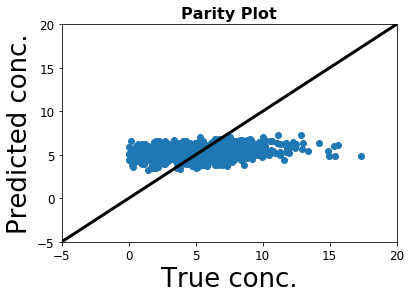

In [39]:
#Parity plot
ax_min = -5
ax_max = 20

plt.scatter(y_test, pred)

plt.plot([ax_min, ax_max], [ax_min, ax_max], color='k', 
         label = 'Perfect Prediction', linewidth=3)


plt.ylim(ax_min, ax_max)
plt.xlim(ax_min, ax_max)
plt.xlabel('True conc.', fontsize=26)
plt.ylabel('Predicted conc.', fontsize=26)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Parity Plot', fontsize = 16, weight='bold')
#plt.legend(fontsize = 20)